# CODIGO HEY BANCO

## Librerias necesarias

In [ ]:
!pip install unidecode
!pip install nltk
!pip install pysentimiento
!pip install sentiment_analysis_spanish

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 32.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl

In [ ]:
import pandas as pd
import numpy as np
import regex as re
from unidecode import unidecode
import unicodedata
from sentiment_analysis_spanish import sentiment_analysis
from pysentimiento import create_analyzer
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

## Lectura de CSV HEY BANCO

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datathon2024Bases/Datathon 2024 - Reto Hey - Dataset Público - Sheet1.csv")

In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,date,time,tweet
0,2023-01-01,NaN,"Resuelto, muchísimas gracias , excelente servi..."
1,2023-01-02,NaN,"Muchas gracias, espero su dm"
2,2023-01-02,NaN,Muchas gracias!
3,2023-01-02,NaN,Algo similar me paso. Quería renovar mi token ...
4,2023-01-02,NaN,Yeeeei! a través de mi cuenta en acabo de cont...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    812 non-null    object
 1   time    424 non-null    object
 2   tweet   812 non-null    object
dtypes: object(3)
memory usage: 19.2+ KB


## Limpieza de Datos (ACENTOS Y MAYUSCULAS)

In [ ]:
def replace_vocals(s):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for a, b in replacements:
        s = s.replace(a, b).replace(a.upper(), b.upper())
    return s
df['tweet'] = df['tweet'].str.lower()
df['tweet'] = df['tweet'].apply(replace_vocals)


In [ ]:
df.head(10)

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,date,time,tweet
0,2023-01-01,NaN,"resuelto, muchisimas gracias , excelente servi..."
1,2023-01-02,NaN,"muchas gracias, espero su dm"
2,2023-01-02,NaN,muchas gracias!
3,2023-01-02,NaN,algo similar me paso. queria renovar mi token ...
4,2023-01-02,NaN,yeeeei! a traves de mi cuenta en acabo de cont...
5,2023-01-02,NaN,esta es la señal que necesitan para tener el m...
6,2023-01-03,NaN,gracias 😁
7,2023-01-03,NaN,muchas gracias 😊
8,2023-01-03,NaN,"yo no se mucho, pero te recomiendo la inversio..."
9,2023-01-04,NaN,gracias por la playera que me dieron en galeri...


## LISTAS DE PALABRAS Y EMOJIS

In [ ]:
df[df["tweet"].str.contains("gracias", na=False)]

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,date,time,tweet
0,2023-01-01,NaN,"resuelto, muchisimas gracias , excelente servi..."
1,2023-01-02,NaN,"muchas gracias, espero su dm"
2,2023-01-02,NaN,muchas gracias!
6,2023-01-03,NaN,gracias 😁
7,2023-01-03,NaN,muchas gracias 😊
...,...,...,...
803,2024-04-17,04:45:42,gracias 🤩
804,2024-04-18,17:28:23,gracias
805,2024-04-18,15:59:11,los amo! gracias ya pude entrar a mi app salud...
807,2024-04-21,15:21:43,"ahora confirmo, gracias estimado"


In [ ]:
nltk.download('punkt')

all_words = []
for tweet in df['tweet']:
    words = word_tokenize(str(tweet).lower())  # Tokenización y convirtiendo a minúsculas
    all_words.extend([word for word in words if len(word) > 5])

word_counts = Counter(all_words)

top_40_words = word_counts.most_common(40)

print("Las primeras 40 palabras de más de 4 letras más utilizadas en los tweets son:")
for word, count in top_40_words:
    print(f"{word}: {count}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Las primeras 40 palabras de más de 4 letras más utilizadas en los tweets son:
gracias: 329
muchas: 89
heybanco: 59
tarjeta: 49
cuenta: 33
tambien: 27
credito: 27
excelente: 25
recomiendo: 23
problema: 21
saludos: 20
dinero: 17
cuando: 17
siempre: 16
ustedes: 16
opcion: 16
respuesta: 16
rapido: 16
servicio: 15
atencion: 15
jajaja: 14
informacion: 14
experiencia: 14
despues: 13
verdad: 13
bancos: 13
clientes: 13
inversion: 12
tienen: 12
tiempo: 12
correo: 12
resuelto: 11
problemas: 11
espero: 10
cliente: 10
funciono: 10
aplicacion: 10
buenos: 10
mejores: 9
puedes: 9


In [ ]:
palabras_preguntas = ["pregunta", "preguntas", "¿", "duda", "dudas", "?", "interrogante", "interrogantes", "inquire", "inquirir", "cuestion", "cuestiones", "indagar", "indagacion", "saber",
                      "interrogar", "averiguar", "confusion", "confuso", "inseguro", "incertidumbre", "cuestionamiento", "consultar", "ayuda", "necesito"
]

palabras_positivas = [
    "bueno", "buena", "buenos", "excelente", "rapido", "correcto", 'accesible', 'amable', 'amigable', 'amo', 'confiable', 'conveniente', 'diligente', 'efectivo', 'eficaz', 'eficiente', 'fiable', 'flexible', 'facil',
 'gracias', 'innovador', 'intuitivo', 'moderno', 'personalizado', 'premio', 'profesional', 'responsable', 'rapido', 'satisfactorio', 'seguro', 'tkm',
 'tqm', 'transparente', 'agil', 'util', "ganar", "gane", "mejor", "feliz", "mejor", "agradecido", "agradecida", "atencion", "super", "quedo"
]

palabras_negativas = [
'anticuado', 'burocratico', 'complicado', 'confuso', 'deficiente', 'desagradable', 'desatento', 'descontento', 'descuidado', 'desfavorable', 'deshonesto', 'desorganizado',
 'engañoso', 'engorroso', 'estresante', 'frustrante', 'inaccesible', 'inadecuado', 'incompetente', 'incomodo', 'ineficaz', 'ineficiente', 'inestable', 'inexacto', 'insatisfactorio',
 'inseguro', 'inutil', 'irresponsable', 'lento', 'limitado', 'molesto', 'negligente', 'poco fiable', 'problematico', "perdí", "horrible", "malo", "nunca"
]

In [ ]:
emojis = pd.read_csv('/content/drive/MyDrive/Datathon2024Bases/emoji_data.csv')

del(emojis['Bytes'])

positive_words = ['SMILING', 'HAPPY', 'JOY', 'LAUGHING', 'GRINNING',
            'WINKING', 'RELIEVED', 'CELEBRATION', 'FOLDED HANDS', 'VICTORY',
            'THUMBS UP', 'CLAPPING', 'OPEN HANDS', 'HEART', 'HEARTS', 'FLEXED BICEPS', 'KISSING FACE']

negative_words = ['ANGRY', 'POUTING', 'THUMBS DOWN', 'MOUSE FACE', 'RAT', 'FEAR', 'UNAMUSED', 'CONFOUNDED', 'PENSIVE', 'WEARY', 'SLEEPY FACE', 'TIRED FACE', 'COLD SWEAT', 'RAISED FIST']

emojis_positivos = []
unicodes_positivos = []

for index, row in emojis.iterrows():
    for word in positive_words:
        if word in row['Description']:
            emojis_positivos.append(row['Emoji'])
            unicodes_positivos.append(row['Unicode'])

emojis_positivos = pd.Series(emojis_positivos)
unicodes_positivos = pd.Series(unicodes_positivos)
df_positivo = pd.DataFrame({'emoji':emojis_positivos, 'unicode':unicodes_positivos})

emojis_negativos = []
unicodes_negativos = []

for index, row in emojis.iterrows():
    for word in negative_words:
        if word in row['Description']:
            emojis_negativos.append(row['Emoji'])
            unicodes_negativos.append(row['Unicode'])

emojis_negativos = pd.Series(emojis_negativos)
unicodes_negativos = pd.Series(unicodes_negativos)
df_negativo = pd.DataFrame({'emoji':emojis_negativos, 'unicode':unicodes_negativos})
df_negativo.drop(0,inplace=True)
df_negativo.drop(15,inplace=True)

In [ ]:
emojis_positivos_lista = emojis_positivos.tolist()
emojis_negativos_lista = emojis_negativos.tolist()

## Clasificación de las emociones

### Clasificación Mediante Palabras Clave-Emojis

In [ ]:
df['sentimiento-palabras-emojis'] = None
for index, row in df.iterrows():
    for palabra in palabras_preguntas:
        if palabra in row['tweet']:
            df.at[index, 'sentimiento-palabras-emojis'] = "Pregunta"
            break
    for emoji in emojis_positivos_lista:
      for palabra in palabras_positivas:
          if palabra in row['tweet'] or emoji in row['tweet']:
            df.at[index, 'sentimiento-palabras-emojis'] = "Positivo"
            break
    for emoji in emojis_negativos_lista:
      for palabra in palabras_negativas or emoji in emojis_negativos:
          if palabra in row['tweet'] or emoji in row['tweet']:
            df.at[index, 'sentimiento-palabras-emojis'] = "Negativo"
          elif pd.isnull(df.at[index, 'sentimiento-palabras-emojis']):
            df.at[index, 'sentimiento-palabras-emojis'] = "Neutral"
            break
filas_con_interrogacion = df['tweet'].str.contains("\\?", na=False)
df.loc[filas_con_interrogacion, 'sentimiento-palabras-emojis'] = "Pregunta"
filas_con_jajas = df['tweet'].str.contains("jaja|jajaja|jajajaja|jajajajaja", case=False, na=False)
df.loc[filas_con_jajas, 'sentimiento-palabras-emojis'] = "Sarcasmo/Doble Sentido/Broma"


In [ ]:
df['sentimiento-palabras-emojis'].value_counts()

sentimiento-palabras-emojis
Positivo                        511
Neutral                         197
Pregunta                         51
Sarcasmo/Doble Sentido/Broma     27
Negativo                         26
Name: count, dtype: int64

### Clasificación mediante porcentaje de sentimiento (Libreria "sentiment_analysis_spanish")

In [ ]:
sentiment = sentiment_analysis.SentimentAnalysisSpanish()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
df['porcentaje-sentimiento-libreria'] = None
for index, fila in df.iterrows():
    porcentaje_sentimiento = sentiment.sentiment(fila[2])
    if porcentaje_sentimiento <= 0.10:
      df.at[index, 'porcentaje-sentimiento-libreria'] = "Negativo"
    elif porcentaje_sentimiento > 0.10 and porcentaje_sentimiento <= 0.35:
      df.at[index, 'porcentaje-sentimiento-libreria'] = "Neutral"
    else:
      df.at[index, 'porcentaje-sentimiento-libreria'] = "Positivo"

In [ ]:
df['porcentaje-sentimiento-libreria'].value_counts()

porcentaje-sentimiento-libreria
Negativo    418
Positivo    258
Neutral     136
Name: count, dtype: int64

### Clasificación Mediante Porcentaje y Palabras Clave-Emojis

In [ ]:
df['SENTIMIENTO-FINAL'] = None
for index, fila in df.iterrows():
  if df.at[index, 'sentimiento-palabras-emojis'] == "Pregunta" or df.at[index, 'sentimiento-palabras-emojis'] == df.at[index, 'porcentaje-sentimiento-libreria']:
    df.at[index, 'SENTIMIENTO-FINAL'] = df.at[index, 'sentimiento-palabras-emojis']
  elif df.at[index, 'sentimiento-palabras-emojis'] == "Positivo" and df.at[index, 'porcentaje-sentimiento-libreria'] == "Neutral" or df.at[index, 'sentimiento-palabras-emojis'] == "Neutral" and df.at[index, 'porcentaje-sentimiento-libreria'] == "Positivo":
    df.at[index, 'SENTIMIENTO-FINAL'] = "Positivo"
  elif df.at[index, 'sentimiento-palabras-emojis'] == "Negativo" and df.at[index, 'porcentaje-sentimiento-libreria'] == "Neutral" or df.at[index, 'sentimiento-palabras-emojis'] == "Neutral" and df.at[index, 'porcentaje-sentimiento-libreria'] == "Negativo":
    df.at[index, 'SENTIMIENTO-FINAL'] = "Negativo"
  elif df.at[index, 'sentimiento-palabras-emojis'] == "Positivo" and df.at[index, 'porcentaje-sentimiento-libreria'] == "Negativo" or df.at[index, 'sentimiento-palabras-emojis'] == "Negativo" and df.at[index, 'porcentaje-sentimiento-libreria'] == "Positivo":
    df.at[index, 'SENTIMIENTO-FINAL'] = "Sarcasmo/Doble Sentido/Broma"
  elif df.at[index, 'sentimiento-palabras-emojis'] == "Sarcasmo/Doble Sentido/Broma":
    df.at[index, 'SENTIMIENTO-FINAL'] = "Sarcasmo/Doble Sentido/Broma"

In [ ]:
df['SENTIMIENTO-FINAL'].value_counts()

SENTIMIENTO-FINAL
Positivo                        322
Sarcasmo/Doble Sentido/Broma    271
Negativo                        130
Pregunta                         51
Neutral                          38
Name: count, dtype: int64

### Clasificación Mediante Sentimiento (Libreria: "pysentimiento")

In [ ]:
analyzer = create_analyzer(task="sentiment", lang="es")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/925 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

In [ ]:
df['sentimiento-libreria-2'] = None
for index, fila in df.iterrows():
    ps = analyzer.predict(fila[2])
    if ps.output == "POS":
      df.at[index, 'sentimiento-libreria-2'] = "Positivo"
    if ps.output == "NEU":
      df.at[index, 'sentimiento-libreria-2'] = "Neutral"
    if ps.output == "NEG":
      df.at[index, 'sentimiento-libreria-2'] = "Negativo"

In [ ]:
df['sentimiento-libreria-2'].value_counts()

sentimiento-libreria-2
Positivo    449
Neutral     323
Negativo     40
Name: count, dtype: int64

### Clasificación Mediante Sentimiento y Palabras Clave-Emojis

In [ ]:
df['SENTIMIENTO-FINAL-2'] = None
for index, fila in df.iterrows():
  if df.at[index, 'sentimiento-palabras-emojis'] == "Pregunta" or df.at[index, 'sentimiento-palabras-emojis'] == df.at[index, 'sentimiento-libreria-2']:
    df.at[index, 'SENTIMIENTO-FINAL-2'] = df.at[index, 'sentimiento-palabras-emojis']
  elif df.at[index, 'sentimiento-palabras-emojis'] == "Positivo" and df.at[index, 'sentimiento-libreria-2'] == "Neutral" or df.at[index, 'sentimiento-palabras-emojis'] == "Neutral" and df.at[index, 'sentimiento-libreria-2'] == "Positivo":
    df.at[index, 'SENTIMIENTO-FINAL-2'] = "Positivo"
  elif df.at[index, 'sentimiento-palabras-emojis'] == "Negativo" and df.at[index, 'sentimiento-libreria-2'] == "Neutral" or df.at[index, 'sentimiento-palabras-emojis'] == "Neutral" and df.at[index, 'sentimiento-libreria-2'] == "Negativo":
    df.at[index, 'SENTIMIENTO-FINAL-2'] = "Negativo"
  elif df.at[index, 'sentimiento-palabras-emojis'] == "Positivo" and df.at[index, 'sentimiento-libreria-2'] == "Negativo" or df.at[index, 'sentimiento-palabras-emojis'] == "Negativo" and df.at[index, 'sentimiento-libreria-2'] == "Positivo":
    df.at[index, 'SENTIMIENTO-FINAL-2'] = "Sarcasmo/Doble Sentido/Broma"
  elif df.at[index, 'sentimiento-palabras-emojis'] == "Sarcasmo/Doble Sentido/Broma":
    df.at[index, 'SENTIMIENTO-FINAL-2'] = "Sarcasmo/Doble Sentido/Broma"

In [ ]:
df['SENTIMIENTO-FINAL-2'].value_counts()

SENTIMIENTO-FINAL-2
Positivo                        576
Neutral                         101
Sarcasmo/Doble Sentido/Broma     56
Pregunta                         51
Negativo                         28
Name: count, dtype: int64

### Clasificación Mediante Emoción (Libreria: "pysentimiento")

In [ ]:
analyzer2 = create_analyzer(task="emotion", lang="es")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

In [ ]:
df['sentimiento-libreria-3'] = None
for index, fila in df.iterrows():
    s2 = analyzer2.predict(fila[2])
    if s2.output == "happiness" or s2.output == "joy" or s2.output == "calm":
      df.at[index, 'sentimiento-libreria-3'] = "Positivo"

    if s2.output == "confusion" or s2.output == "others":
      df.at[index, 'sentimiento-libreria-3'] = "Neutral"

    if s2.output == "sadness" or s2.output == "anger" or s2.output == "fear" or s2.output == "disgust" or s2.output == "anxiety" or  s2.output == "surprise" :
      df.at[index, 'sentimiento-libreria-3'] = "Negativo"

In [ ]:
df['sentimiento-libreria-3'].value_counts()

sentimiento-libreria-3
Neutral     467
Positivo    321
Negativo     24
Name: count, dtype: int64

### Clasificación Mediante Emoción y Palabras Clave-Emojis

In [ ]:
df['SENTIMIENTO-FINAL-3'] = None
for index, fila in df.iterrows():
  if df.at[index, 'sentimiento-palabras-emojis'] == "Pregunta" or df.at[index, 'sentimiento-palabras-emojis'] == df.at[index, 'sentimiento-libreria-3']:
    df.at[index, 'SENTIMIENTO-FINAL-3'] = df.at[index, 'sentimiento-palabras-emojis']
  elif df.at[index, 'sentimiento-palabras-emojis'] == "Positivo" and df.at[index, 'sentimiento-libreria-3'] == "Neutral" or df.at[index, 'sentimiento-palabras-emojis'] == "Neutral" and df.at[index, 'sentimiento-libreria-3'] == "Positivo":
    df.at[index, 'SENTIMIENTO-FINAL-3'] = "Positivo"
  elif df.at[index, 'sentimiento-palabras-emojis'] == "Negativo" and df.at[index, 'sentimiento-libreria-3'] == "Neutral" or df.at[index, 'sentimiento-palabras-emojis'] == "Neutral" and df.at[index, 'sentimiento-libreria-3'] == "Negativo":
    df.at[index, 'SENTIMIENTO-FINAL-3'] = "Negativo"
  elif df.at[index, 'sentimiento-palabras-emojis'] == "Positivo" and df.at[index, 'sentimiento-libreria-3'] == "Negativo" or df.at[index, 'sentimiento-palabras-emojis'] == "Negativo" and df.at[index, 'sentimiento-libreria-3'] == "Positivo":
    df.at[index, 'SENTIMIENTO-FINAL-3'] = "Sarcasmo/Doble Sentido/Broma"
  elif df.at[index, 'sentimiento-palabras-emojis'] == "Sarcasmo/Doble Sentido/Broma":
    df.at[index, 'SENTIMIENTO-FINAL-3'] = "Sarcasmo/Doble Sentido/Broma"

In [ ]:
df['SENTIMIENTO-FINAL-3'].value_counts()

SENTIMIENTO-FINAL-3
Positivo                        554
Neutral                         139
Pregunta                         51
Sarcasmo/Doble Sentido/Broma     42
Negativo                         26
Name: count, dtype: int64

### Clasificación Mediante Emoción y Sentimiento

In [ ]:
df['SF'] = None
for index, fila in df.iterrows():
  if df.at[index, 'sentimiento-libreria-2'] == "Pregunta" or df.at[index, 'sentimiento-libreria-2'] == df.at[index, 'sentimiento-libreria-3']:
    df.at[index, 'SF'] = df.at[index, 'sentimiento-libreria-2']
  elif df.at[index, 'sentimiento-libreria-2'] == "Positivo" and df.at[index, 'sentimiento-libreria-3'] == "Neutral" or df.at[index, 'sentimiento-libreria-2'] == "Neutral" and df.at[index, 'sentimiento-libreria-3'] == "Positivo":
    df.at[index, 'SF'] = "Positivo"
  elif df.at[index, 'sentimiento-libreria-2'] == "Negativo" and df.at[index, 'sentimiento-libreria-3'] == "Neutral" or df.at[index, 'sentimiento-libreria-2'] == "Neutral" and df.at[index, 'sentimiento-libreria-3'] == "Negativo":
    df.at[index, 'SF'] = "Negativo"
  elif df.at[index, 'sentimiento-libreria-2'] == "Positivo" and df.at[index, 'sentimiento-libreria-3'] == "Negativo":
    df.at[index, 'SF'] = "Negativo"
  elif df.at[index, 'sentimiento-libreria-2'] == "Negativo" and df.at[index, 'sentimiento-libreria-3'] == "Positivo":
    df.at[index, 'SF'] = "Positivo"

In [ ]:
df['SF'].value_counts()

SF
Positivo    503
Neutral     259
Negativo     50
Name: count, dtype: int64

### Clasificación Mediante Emoción-Sentimiento y Palabras Clave-Emojis

In [ ]:
df['SENTIMIENTO'] = None
for index, fila in df.iterrows():
  if df.at[index, 'sentimiento-palabras-emojis'] == "Pregunta" or df.at[index, 'sentimiento-palabras-emojis'] == df.at[index, 'SF']:
    df.at[index, 'SENTIMIENTO'] = df.at[index, 'sentimiento-palabras-emojis']
  elif df.at[index, 'sentimiento-palabras-emojis'] == "Positivo" and df.at[index, 'SF'] == "Neutral" or df.at[index, 'sentimiento-palabras-emojis'] == "Neutral" and df.at[index, 'SF'] == "Positivo":
    df.at[index, 'SENTIMIENTO'] = "Positivo"
  elif df.at[index, 'sentimiento-palabras-emojis'] == "Negativo" and df.at[index, 'SF'] == "Neutral" or df.at[index, 'sentimiento-palabras-emojis'] == "Neutral" and df.at[index, 'SF'] == "Negativo":
    df.at[index, 'SENTIMIENTO'] = "Negativo"
  elif df.at[index, 'sentimiento-palabras-emojis'] == "Positivo" and df.at[index, 'SF'] == "Negativo" or df.at[index, 'sentimiento-palabras-emojis'] == "Negativo" and df.at[index, 'SF'] == "Positivo":
    df.at[index, 'SENTIMIENTO'] = "Sarcasmo/Doble Sentido/Broma"
  elif df.at[index, 'sentimiento-palabras-emojis'] == "Sarcasmo/Doble Sentido/Broma":
    df.at[index, 'SENTIMIENTO'] = "Sarcasmo/Doble Sentido/Broma"

In [ ]:
df['SENTIMIENTO'].value_counts()

SENTIMIENTO
Positivo                        580
Neutral                          92
Sarcasmo/Doble Sentido/Broma     57
Pregunta                         51
Negativo                         32
Name: count, dtype: int64

### Comparación de clasificaciónes con diferentes metodos

In [ ]:
igual_12 = (df['SENTIMIENTO-FINAL'] == df['SENTIMIENTO-FINAL-2']).sum()
igual_13 = (df['SENTIMIENTO-FINAL'] == df['SENTIMIENTO-FINAL-3']).sum()
igual_23 = (df['SENTIMIENTO-FINAL-2'] == df['SENTIMIENTO-FINAL-3']).sum()

total_igual = igual_12 + igual_13 + igual_23

total_filas = len(df)

porcentaje_igual = (total_igual / (3 * total_filas)) * 100
porcentaje_diferente = 100 - porcentaje_igual

print(f"Valores iguales: {total_igual}, Porcentaje: {porcentaje_igual}%")
print(f"Valores diferentes: {3 * total_filas - total_igual}, Porcentaje: {porcentaje_diferente}%")


Valores iguales: 1593, Porcentaje: 65.39408866995073%
Valores diferentes: 843, Porcentaje: 34.60591133004927%


In [ ]:
igual = (df['SENTIMIENTO-FINAL-2'] == df['SENTIMIENTO-FINAL-3']).sum()
diferente = len(df) - igual
total = len(df)
porcentaje_igual = (igual / total) * 100
porcentaje_diferente = (diferente / total) * 100

print(f"Valores iguales: {igual}, Porcentaje: {porcentaje_igual}%")
print(f"Valores diferentes: {diferente}, Porcentaje: {porcentaje_diferente}%")

Valores iguales: 738, Porcentaje: 90.88669950738915%
Valores diferentes: 74, Porcentaje: 9.113300492610838%


In [ ]:
igual = (df['SENTIMIENTO-FINAL-2'] == df['SENTIMIENTO']).sum()
diferente = len(df) - igual
total = len(df)
porcentaje_igual = (igual / total) * 100
porcentaje_diferente = (diferente / total) * 100

print(f"Valores iguales: {igual}, Porcentaje: {porcentaje_igual}%")
print(f"Valores diferentes: {diferente}, Porcentaje: {porcentaje_diferente}%")

Valores iguales: 800, Porcentaje: 98.52216748768473%
Valores diferentes: 12, Porcentaje: 1.477832512315271%


In [ ]:
igual = (df['SENTIMIENTO'] == df['SENTIMIENTO-FINAL-3']).sum()
diferente = len(df) - igual
total = len(df)
porcentaje_igual = (igual / total) * 100
porcentaje_diferente = (diferente / total) * 100

print(f"Valores iguales: {igual}, Porcentaje: {porcentaje_igual}%")
print(f"Valores diferentes: {diferente}, Porcentaje: {porcentaje_diferente}%")

Valores iguales: 750, Porcentaje: 92.36453201970444%
Valores diferentes: 62, Porcentaje: 7.635467980295567%


## Visualización de Datos (Gráficas)

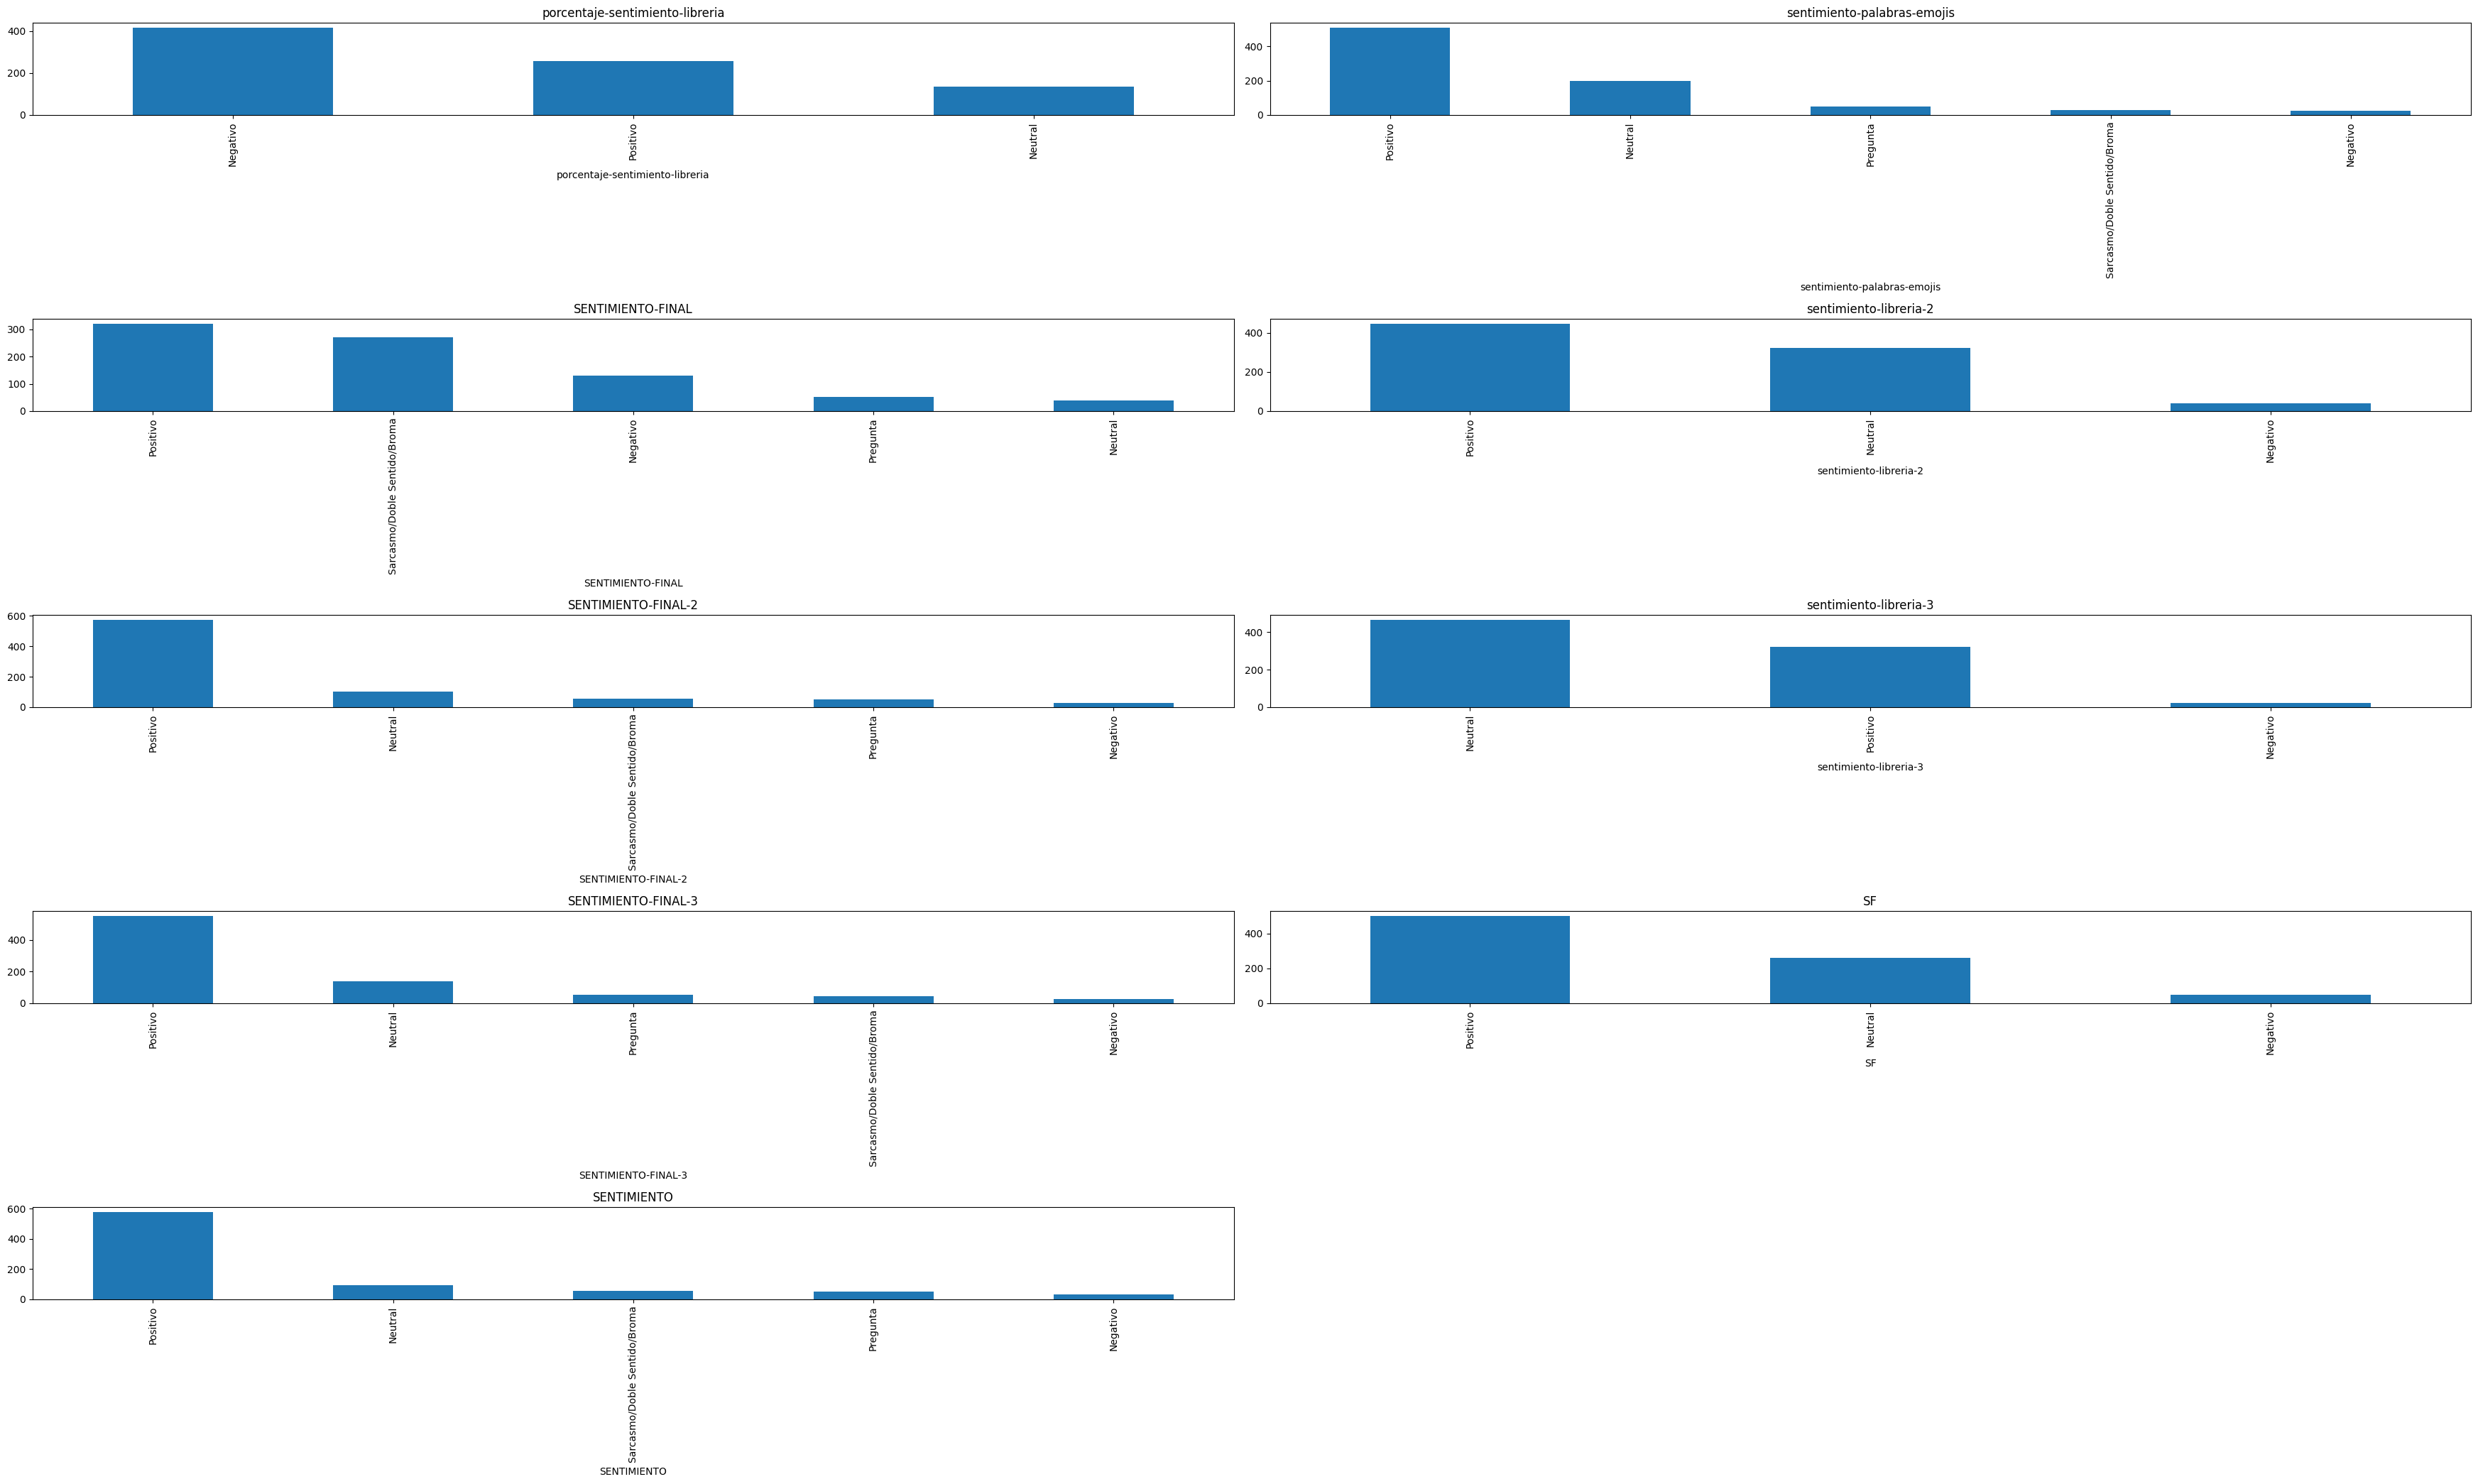

In [ ]:
columnas_objeto = df.iloc[:, 3:]
plt.figure(figsize=(35, 21))
for i, columna in enumerate(columnas_objeto.columns):
    plt.subplot(len(columnas_objeto.columns)//2 + 1, 2, i+1)
    columnas_objeto[columna].value_counts().plot(kind='bar')
    plt.title(f'{columna}')

plt.tight_layout()
plt.show()

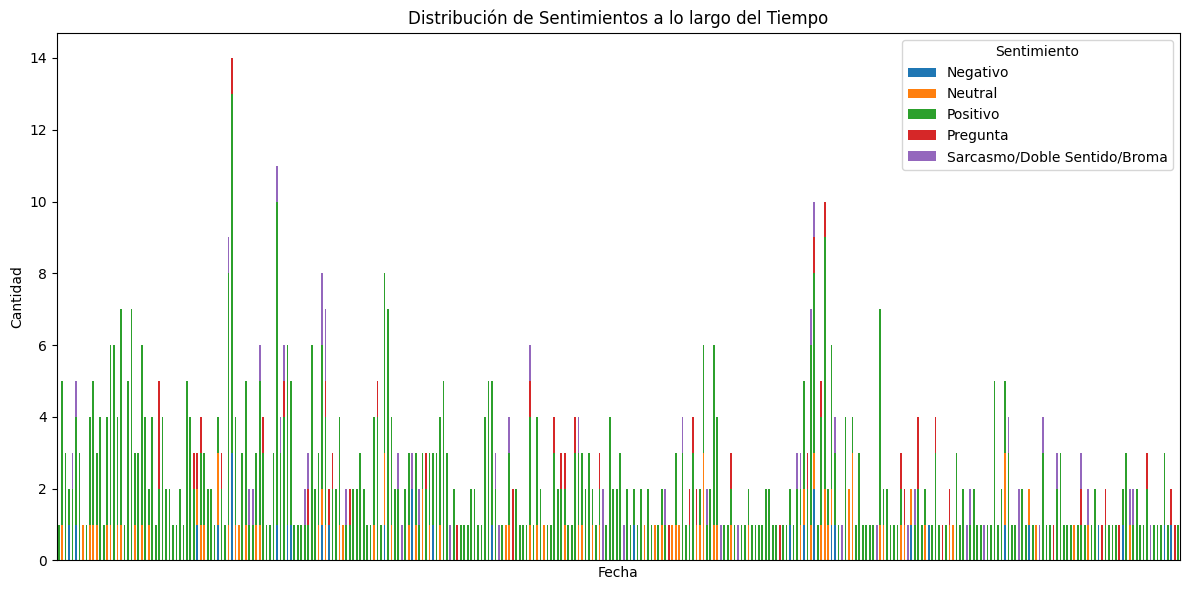

In [ ]:
df['date'] = pd.to_datetime(df['date'])

pivot_table = df.pivot_table(index='date', columns='SENTIMIENTO', aggfunc='size', fill_value=0)

pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribución de Sentimientos a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.xticks([])
plt.legend(title='Sentimiento')
plt.tight_layout()
plt.show()

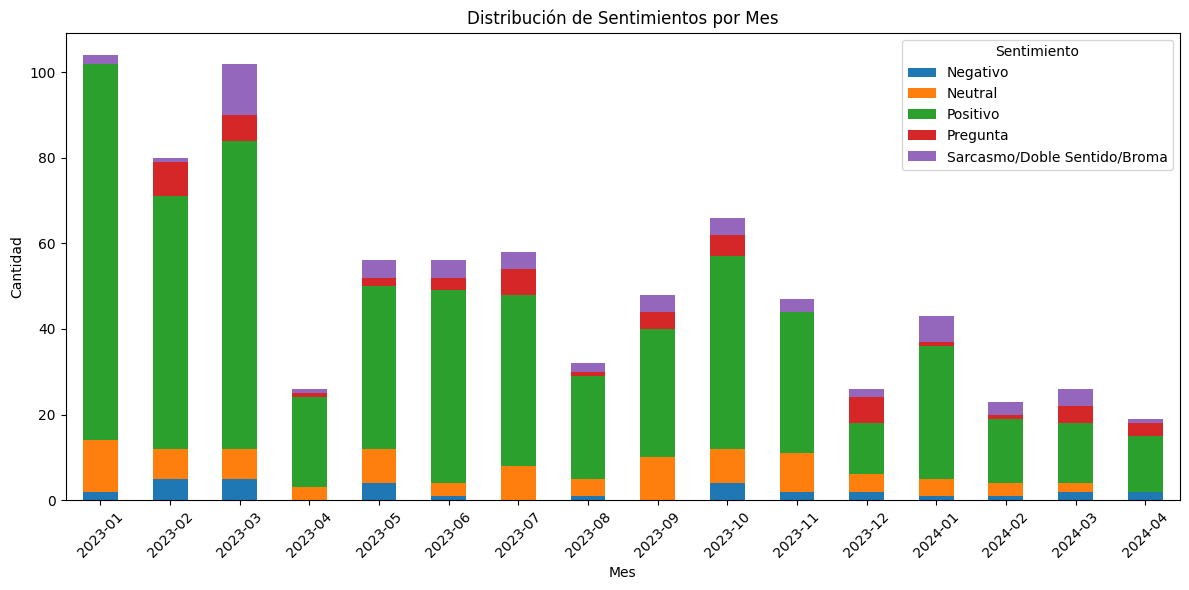

In [ ]:
df['date'] = pd.to_datetime(df['date'])

df['month'] = df['date'].dt.to_period('M')

pivot_table = df.pivot_table(index='month', columns='SENTIMIENTO', aggfunc='size', fill_value=0)

pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribución de Sentimientos por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Sentimiento')
plt.tight_layout()
plt.show()


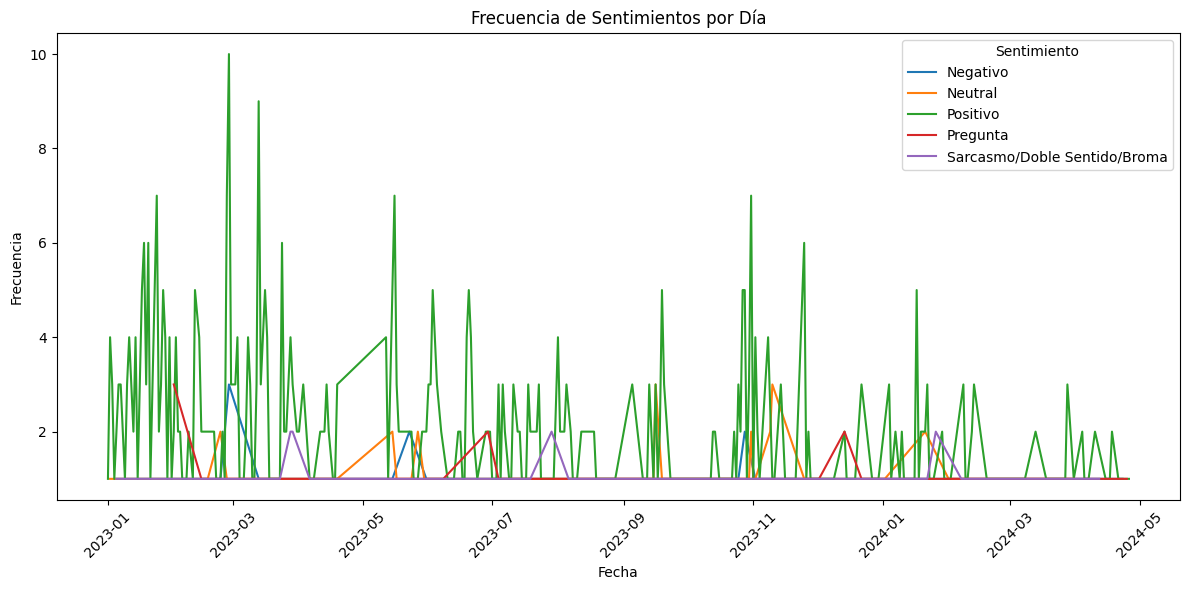

In [ ]:
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(12, 6))

for sentiment, group in df.groupby('SENTIMIENTO'):
    group.groupby(group['date'].dt.date).size().plot(label=sentiment)

plt.title('Frecuencia de Sentimientos por Día')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(title='Sentimiento')
plt.tight_layout()
plt.show()

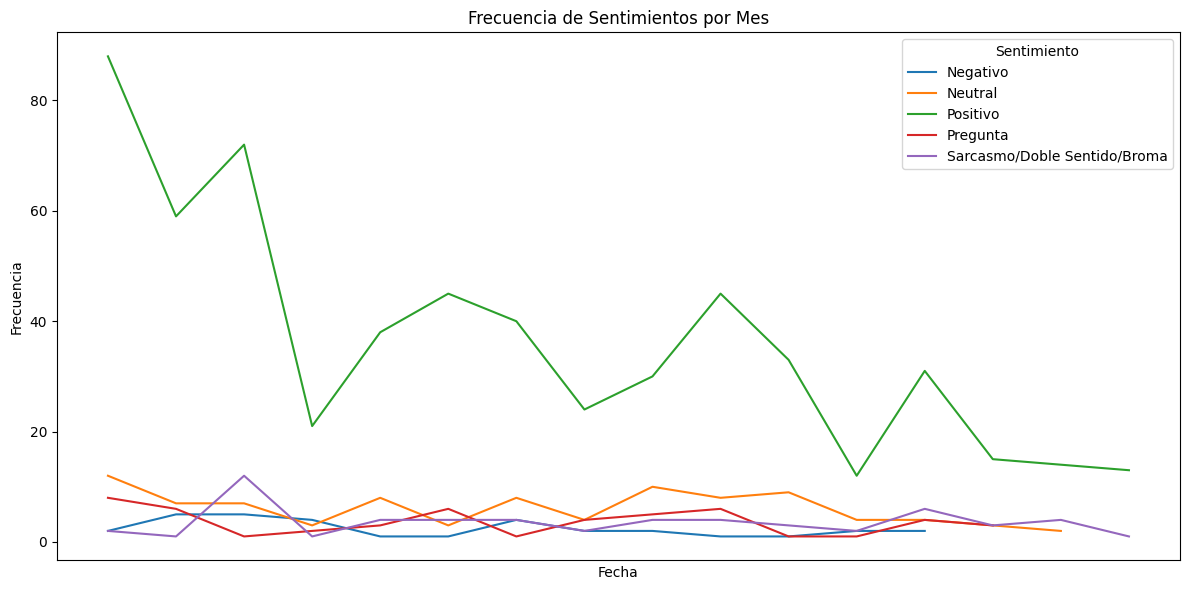

In [ ]:
df['date'] = pd.to_datetime(df['date'])

monthly_data = df.groupby(['SENTIMIENTO', pd.Grouper(key='date', freq='M')]).size()

plt.figure(figsize=(12, 6))

for sentiment, group in monthly_data.groupby(level=0):
    group.plot(label=sentiment)

plt.title('Frecuencia de Sentimientos por Mes')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.legend(title='Sentimiento')
plt.xticks([])
plt.tight_layout()
plt.show()

## Comparación de datos reales con predicciones

In [ ]:
emociones_reales = pd.read_csv("/content/drive/MyDrive/Datathon2024Bases/EmocionesReales2.csv")

In [ ]:
igual = (emociones_reales['Emocion'] == df['SENTIMIENTO']).sum()
diferente = len(df) - igual
total = len(df)
porcentaje_igual = (igual / total) * 100
porcentaje_diferente = (diferente / total) * 100

print(f"Valores iguales: {igual}, Porcentaje: {porcentaje_igual}%")
print(f"Valores diferentes: {diferente}, Porcentaje: {porcentaje_diferente}%")

Valores iguales: 603, Porcentaje: 74.26108374384236%
Valores diferentes: 209, Porcentaje: 25.738916256157633%


In [ ]:
df = pd.concat([df, emociones_reales], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date                             812 non-null    datetime64[ns]
 1   time                             424 non-null    object        
 2   tweet                            812 non-null    object        
 3   porcentaje-sentimiento-libreria  812 non-null    object        
 4   sentimiento-palabras-emojis      812 non-null    object        
 5   SENTIMIENTO-FINAL                812 non-null    object        
 6   sentimiento-libreria-2           812 non-null    object        
 7   SENTIMIENTO-FINAL-2              812 non-null    object        
 8   sentimiento-libreria-3           812 non-null    object        
 9   SENTIMIENTO-FINAL-3              812 non-null    object        
 10  SF                               812 non-null    object       

In [150]:
print("F1_score NLP:", f1_score(df['Emocion'], df['SENTIMIENTO'], average='micro'))

F1_score NLP: 0.7426108374384235


In [151]:
print("Accuracy NLP:", f1_score(df['Emocion'], df['SENTIMIENTO'], average='micro'))

TypeError: 'numpy.float64' object is not callable

In [ ]:
df['Emocion'].value_counts()

Emocion
Positivo                        524
Neutral                         162
Pregunta                         51
Sarcasmo/Doble Sentido/Broma     50
Negativo                         25
Name: count, dtype: int64

In [ ]:
df['SENTIMIENTO'].value_counts()

SENTIMIENTO
Positivo                        580
Neutral                          92
Sarcasmo/Doble Sentido/Broma     57
Pregunta                         51
Negativo                         32
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date                             812 non-null    datetime64[ns]
 1   time                             424 non-null    object        
 2   tweet                            812 non-null    object        
 3   porcentaje-sentimiento-libreria  812 non-null    object        
 4   sentimiento-palabras-emojis      812 non-null    object        
 5   SENTIMIENTO-FINAL                812 non-null    object        
 6   sentimiento-libreria-2           812 non-null    object        
 7   SENTIMIENTO-FINAL-2              812 non-null    object        
 8   sentimiento-libreria-3           812 non-null    object        
 9   SENTIMIENTO-FINAL-3              812 non-null    object        
 10  SF                               812 non-null    object       

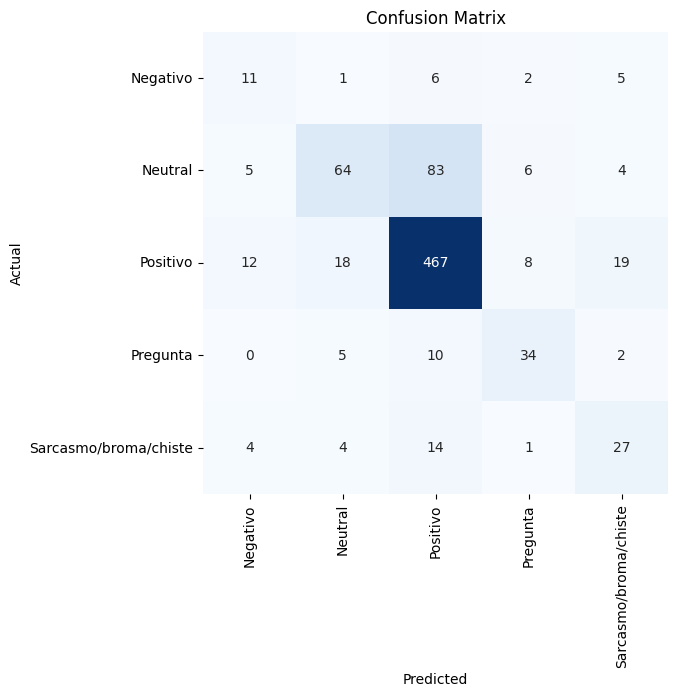

In [ ]:
cm = confusion_matrix(df['Emocion'], df['SENTIMIENTO'])

# Define las etiquetas
etiquetas = ['Negativo', 'Neutral', 'Positivo', 'Pregunta', 'Sarcasmo/broma/chiste']

# Grafica la matriz de confusión
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False, xticklabels=etiquetas, yticklabels=etiquetas)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


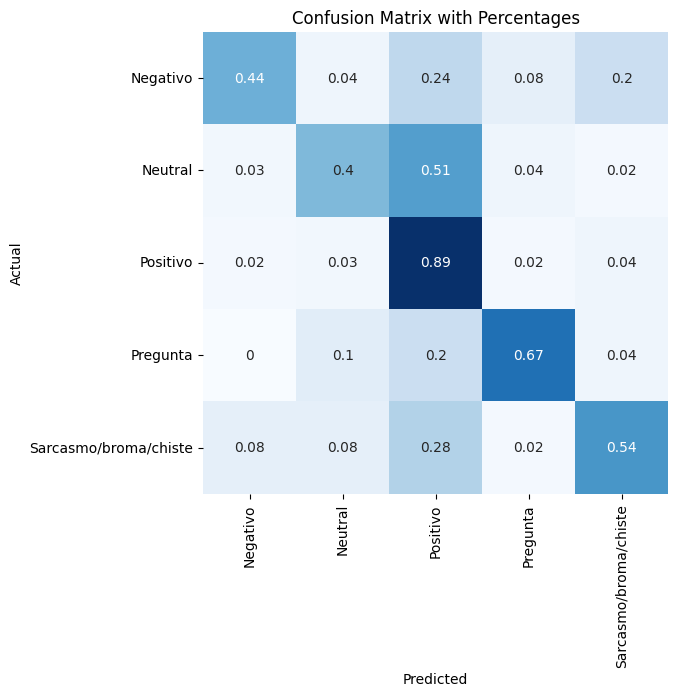

In [ ]:
cm_total = np.sum(cm, axis=1)[:, np.newaxis]
cm_porcentaje = np.round(cm / cm_total, 2)

plt.figure(figsize=(6, 6))
sns.heatmap(cm_porcentaje, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=etiquetas, yticklabels=etiquetas)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix with Percentages")
plt.show()


## Analisis de palabras segun frecuencia (Gráficos)

In [ ]:
# Contar todas las palabras en el conjunto de datos
all_words_total = []
for tweet in df['tweet']:
    words = word_tokenize(str(tweet).lower())
    all_words_total.extend(words)

word_counts_total = Counter(all_words_total)

# Filtrar las palabras en tweets con emoción 'Sarcasmo/Doble Sentido/Broma'
all_words_positivo = []
for i, tweet in enumerate(df['tweet']):
    if df['Emocion'][i] == 'Sarcasmo/Doble Sentido/Broma':
        words = word_tokenize(str(tweet).lower())
        all_words_positivo.extend([word for word in words if len(word) > 3])

word_counts_positivo = Counter(all_words_positivo)

# Calcular las ocurrencias generales en todos los tweets
general_counts = {}
for word, count in word_counts_positivo.items():
    general_counts[word] = (count, word_counts_total[word])

# Ordenar por las ocurrencias en tweets 'Positivo'
sorted_general_counts = sorted(general_counts.items(), key=lambda x: x[1][0], reverse=True)

# Imprimir las 40 palabras más comunes en tweets 'Positivo' y sus ocurrencias generales
print("Las primeras 40 palabras de más de 2 letras más utilizadas en los tweets con emoción 'Sarcasmo/Doble Sentido/Broma' y sus ocurrencias generales:")
for i, (word, counts) in enumerate(sorted_general_counts[:40]):
    print(f"{i+1}. {word}: Aparece {counts[0]} veces en 'Sarcasmo/Doble Sentido/Broma', {counts[1]} veces en general.")


Las primeras 40 palabras de más de 2 letras más utilizadas en los tweets con emoción 'Sarcasmo/Doble Sentido/Broma' y sus ocurrencias generales:
1. jajaja: Aparece 13 veces en 'Sarcasmo/Doble Sentido/Broma', 14 veces en general.
2. gracias: Aparece 9 veces en 'Sarcasmo/Doble Sentido/Broma', 329 veces en general.
3. para: Aparece 9 veces en 'Sarcasmo/Doble Sentido/Broma', 108 veces en general.
4. bueno: Aparece 6 veces en 'Sarcasmo/Doble Sentido/Broma', 21 veces en general.
5. jajajaja: Aparece 6 veces en 'Sarcasmo/Doble Sentido/Broma', 6 veces en general.
6. jaja: Aparece 4 veces en 'Sarcasmo/Doble Sentido/Broma', 5 veces en general.
7. pero: Aparece 4 veces en 'Sarcasmo/Doble Sentido/Broma', 32 veces en general.
8. muchas: Aparece 3 veces en 'Sarcasmo/Doble Sentido/Broma', 89 veces en general.
9. tarjeta: Aparece 3 veces en 'Sarcasmo/Doble Sentido/Broma', 49 veces en general.
10. dias: Aparece 3 veces en 'Sarcasmo/Doble Sentido/Broma', 25 veces en general.
11. heybanco: Aparece 3 vece

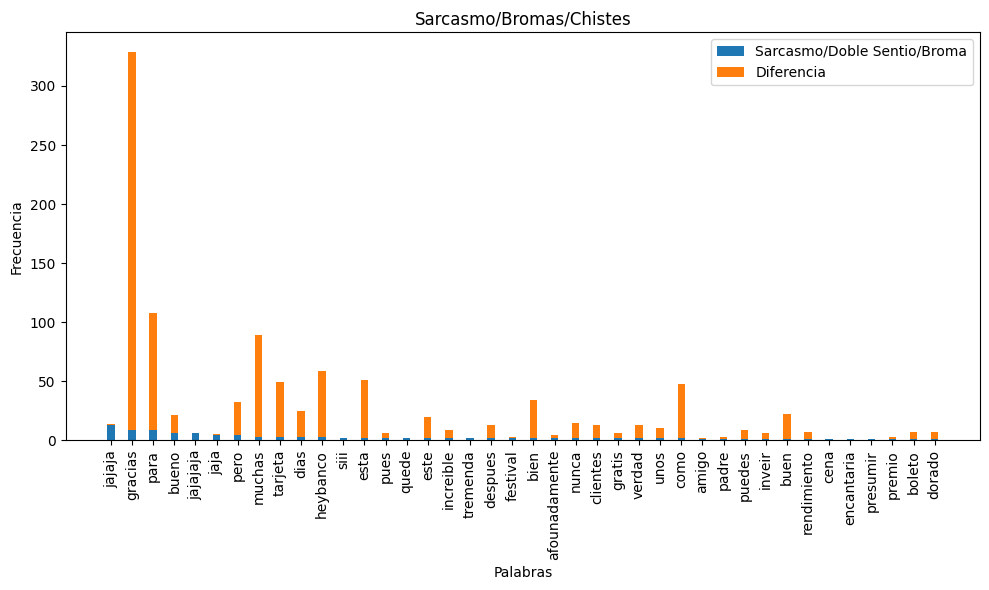

In [ ]:
graf1 = pd.DataFrame(sorted_general_counts, columns=['word', 'count_sarcasmo_general'])
graf1[['count_sarcasmo', 'count_general']] = pd.DataFrame(graf1['count_sarcasmo_general'].tolist(), index=graf1.index)
graf1.drop(columns=['count_sarcasmo_general'], inplace=True)
graf1_top40 = graf1.head(40)
plt.figure(figsize=(10, 6))
index = range(len(graf1_top40))
bar_width = 0.35
diferencia = graf1_top40['count_general'] - graf1_top40['count_sarcasmo']
plt.bar(index, graf1_top40['count_sarcasmo'], bar_width, label='Sarcasmo/Doble Sentio/Broma')
plt.bar(index, diferencia, bar_width, label='Diferencia', bottom=graf1_top40['count_sarcasmo'])
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Sarcasmo/Bromas/Chistes')
plt.xticks(index, graf1_top40['word'], rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Contar todas las palabras en el conjunto de datos
all_words_total = []
for tweet in df['tweet']:
    words = word_tokenize(str(tweet).lower())
    all_words_total.extend(words)

word_counts_total = Counter(all_words_total)

# Filtrar las palabras en tweets con emoción 'Positivo'
all_words_positivo = []
for i, tweet in enumerate(df['tweet']):
    if df['Emocion'][i] == 'Positivo':
        words = word_tokenize(str(tweet).lower())
        all_words_positivo.extend([word for word in words if len(word) > 3])

word_counts_positivo = Counter(all_words_positivo)

# Calcular las ocurrencias generales en todos los tweets
general_counts = {}
for word, count in word_counts_positivo.items():
    general_counts[word] = (count, word_counts_total[word])

# Ordenar por las ocurrencias en tweets 'Positivo'
sorted_general_counts = sorted(general_counts.items(), key=lambda x: x[1][0], reverse=True)

# Imprimir las 40 palabras más comunes en tweets 'Positivo' y sus ocurrencias generales
print("Las primeras 40 palabras de más de 2 letras más utilizadas en los tweets con emoción 'Positivo' y sus ocurrencias generales:")
for i, (word, counts) in enumerate(sorted_general_counts[:40]):
    print(f"{i+1}. {word}: Aparece {counts[0]} veces en 'Positivo', {counts[1]} veces en general.")


Las primeras 40 palabras de más de 2 letras más utilizadas en los tweets con emoción 'Positivo' y sus ocurrencias generales:
1. gracias: Aparece 298 veces en 'Positivo', 329 veces en general.
2. muchas: Aparece 81 veces en 'Positivo', 89 veces en general.
3. para: Aparece 48 veces en 'Positivo', 108 veces en general.
4. heybanco: Aparece 33 veces en 'Positivo', 59 veces en general.
5. esta: Aparece 30 veces en 'Positivo', 51 veces en general.
6. mejor: Aparece 26 veces en 'Positivo', 38 veces en general.
7. banco: Aparece 26 veces en 'Positivo', 41 veces en general.
8. tarjeta: Aparece 22 veces en 'Positivo', 49 veces en general.
9. excelente: Aparece 21 veces en 'Positivo', 25 veces en general.
10. como: Aparece 21 veces en 'Positivo', 48 veces en general.
11. mucho: Aparece 20 veces en 'Positivo', 26 veces en general.
12. super: Aparece 19 veces en 'Positivo', 19 veces en general.
13. bien: Aparece 19 veces en 'Positivo', 34 veces en general.
14. cuenta: Aparece 18 veces en 'Positivo

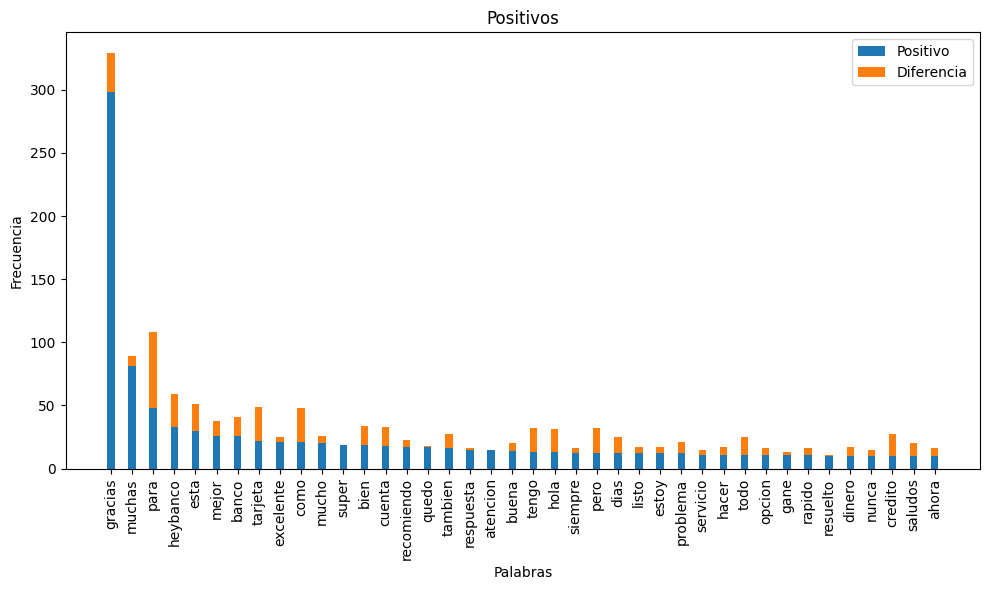

In [ ]:
graf1 = pd.DataFrame(sorted_general_counts, columns=['word', 'count_positivo_general'])
graf1[['count_positivo', 'count_general']] = pd.DataFrame(graf1['count_positivo_general'].tolist(), index=graf1.index)
graf1.drop(columns=['count_positivo_general'], inplace=True)
graf1_top40 = graf1.head(40)
plt.figure(figsize=(10, 6))
index = range(len(graf1_top40))
bar_width = 0.35
diferencia = graf1_top40['count_general'] - graf1_top40['count_positivo']
plt.bar(index, graf1_top40['count_positivo'], bar_width, label='Positivo')
plt.bar(index, diferencia, bar_width, label='Diferencia', bottom=graf1_top40['count_positivo'])
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Positivos')
plt.xticks(index, graf1_top40['word'], rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Contar todas las palabras en el conjunto de datos
all_words_total = []
for tweet in df['tweet']:
    words = word_tokenize(str(tweet).lower())
    all_words_total.extend(words)

word_counts_total = Counter(all_words_total)

# Filtrar las palabras en tweets con emoción 'Negativo'
all_words_positivo = []
for i, tweet in enumerate(df['tweet']):
    if df['Emocion'][i] == 'Negativo':
        words = word_tokenize(str(tweet).lower())
        all_words_positivo.extend([word for word in words if len(word) > 3])

word_counts_positivo = Counter(all_words_positivo)

# Calcular las ocurrencias generales en todos los tweets
general_counts = {}
for word, count in word_counts_positivo.items():
    general_counts[word] = (count, word_counts_total[word])

# Ordenar por las ocurrencias en tweets 'Negativo'
sorted_general_counts = sorted(general_counts.items(), key=lambda x: x[1][0], reverse=True)

# Imprimir las 40 palabras más comunes en tweets 'Negativo' y sus ocurrencias generales
print("Las primeras 40 palabras de más de 2 letras más utilizadas en los tweets con emoción 'Negativo' y sus ocurrencias generales:")
for i, (word, counts) in enumerate(sorted_general_counts[:40]):
    print(f"{i+1}. {word}: Aparece {counts[0]} veces en 'Negativo', {counts[1]} veces en general.")


Las primeras 40 palabras de más de 2 letras más utilizadas en los tweets con emoción 'Negativo' y sus ocurrencias generales:
1. tarjeta: Aparece 7 veces en 'Negativo', 49 veces en general.
2. para: Aparece 4 veces en 'Negativo', 108 veces en general.
3. tengo: Aparece 3 veces en 'Negativo', 32 veces en general.
4. bueno: Aparece 3 veces en 'Negativo', 21 veces en general.
5. bbva: Aparece 3 veces en 'Negativo', 6 veces en general.
6. hasta: Aparece 3 veces en 'Negativo', 19 veces en general.
7. banco: Aparece 3 veces en 'Negativo', 41 veces en general.
8. mejor: Aparece 3 veces en 'Negativo', 38 veces en general.
9. estoy: Aparece 3 veces en 'Negativo', 17 veces en general.
10. como: Aparece 3 veces en 'Negativo', 48 veces en general.
11. tiempo: Aparece 3 veces en 'Negativo', 12 veces en general.
12. nunca: Aparece 3 veces en 'Negativo', 15 veces en general.
13. hacer: Aparece 2 veces en 'Negativo', 17 veces en general.
14. cuenta: Aparece 2 veces en 'Negativo', 33 veces en general.
1

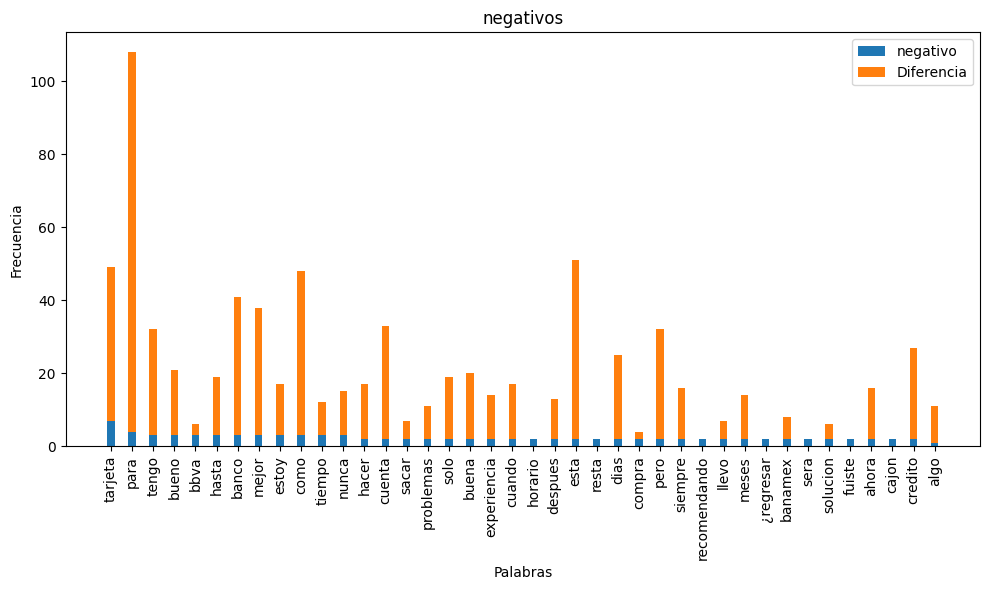

In [ ]:
graf1 = pd.DataFrame(sorted_general_counts, columns=['word', 'count_negativo_general'])
graf1[['count_negativo', 'count_general']] = pd.DataFrame(graf1['count_negativo_general'].tolist(), index=graf1.index)
graf1.drop(columns=['count_negativo_general'], inplace=True)
graf1_top40 = graf1.head(40)
plt.figure(figsize=(10, 6))
index = range(len(graf1_top40))
bar_width = 0.35
diferencia = graf1_top40['count_general'] - graf1_top40['count_negativo']
plt.bar(index, graf1_top40['count_negativo'], bar_width, label='negativo')
plt.bar(index, diferencia, bar_width, label='Diferencia', bottom=graf1_top40['count_negativo'])
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('negativos')
plt.xticks(index, graf1_top40['word'], rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Contar todas las palabras en el conjunto de datos
all_words_total = []
for tweet in df['tweet']:
    words = word_tokenize(str(tweet).lower())
    all_words_total.extend(words)

word_counts_total = Counter(all_words_total)

# Filtrar las palabras en tweets con emoción 'Neutral'
all_words_positivo = []
for i, tweet in enumerate(df['tweet']):
    if df['Emocion'][i] == 'Neutral':
        words = word_tokenize(str(tweet).lower())
        all_words_positivo.extend([word for word in words if len(word) > 3])

word_counts_positivo = Counter(all_words_positivo)

# Calcular las ocurrencias generales en todos los tweets
general_counts = {}
for word, count in word_counts_positivo.items():
    general_counts[word] = (count, word_counts_total[word])

# Ordenar por las ocurrencias en tweets 'Negativo'
sorted_general_counts = sorted(general_counts.items(), key=lambda x: x[1][0], reverse=True)

# Imprimir las 40 palabras más comunes en tweets 'Neutral' y sus ocurrencias generales
print("Las primeras 40 palabras de más de 2 letras más utilizadas en los tweets con emoción 'Neutral' y sus ocurrencias generales:")
for i, (word, counts) in enumerate(sorted_general_counts[:40]):
    print(f"{i+1}. {word}: Aparece {counts[0]} veces en 'Neutral', {counts[1]} veces en general.")


Las primeras 40 palabras de más de 2 letras más utilizadas en los tweets con emoción 'Neutral' y sus ocurrencias generales:
1. para: Aparece 36 veces en 'Neutral', 108 veces en general.
2. heybanco: Aparece 20 veces en 'Neutral', 59 veces en general.
3. esta: Aparece 13 veces en 'Neutral', 51 veces en general.
4. gracias: Aparece 12 veces en 'Neutral', 329 veces en general.
5. tarjeta: Aparece 12 veces en 'Neutral', 49 veces en general.
6. bien: Aparece 12 veces en 'Neutral', 34 veces en general.
7. hola: Aparece 11 veces en 'Neutral', 31 veces en general.
8. todo: Aparece 11 veces en 'Neutral', 25 veces en general.
9. pero: Aparece 10 veces en 'Neutral', 32 veces en general.
10. cuenta: Aparece 9 veces en 'Neutral', 33 veces en general.
11. banco: Aparece 9 veces en 'Neutral', 41 veces en general.
12. linea: Aparece 9 veces en 'Neutral', 14 veces en general.
13. como: Aparece 8 veces en 'Neutral', 48 veces en general.
14. saludos: Aparece 8 veces en 'Neutral', 20 veces en general.
15.

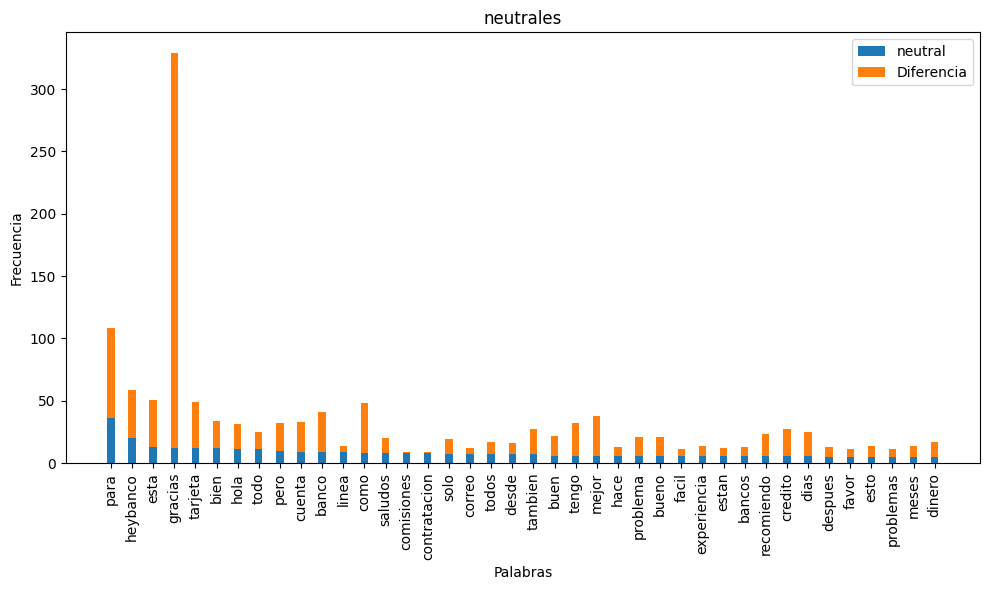

In [ ]:
graf1 = pd.DataFrame(sorted_general_counts, columns=['word', 'count_neutral_general'])
graf1[['count_neutral', 'count_general']] = pd.DataFrame(graf1['count_neutral_general'].tolist(), index=graf1.index)
graf1.drop(columns=['count_neutral_general'], inplace=True)
graf1_top40 = graf1.head(40)
plt.figure(figsize=(10, 6))
index = range(len(graf1_top40))
bar_width = 0.35
diferencia = graf1_top40['count_general'] - graf1_top40['count_neutral']
plt.bar(index, graf1_top40['count_neutral'], bar_width, label='neutral')
plt.bar(index, diferencia, bar_width, label='Diferencia', bottom=graf1_top40['count_neutral'])
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('neutrales')
plt.xticks(index, graf1_top40['word'], rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

## Módelo de Clasificación

In [ ]:
X = df[['SENTIMIENTO-FINAL-3','SENTIMIENTO-FINAL-2','SENTIMIENTO-FINAL','sentimiento-libreria-2','sentimiento-libreria-3','SF']]
y = df['Emocion']
custom_labels = ['Positivo', 'Neutral', 'Negativo','Pregunta','Sarcasmo/Doble Sentido/Broma']
encoder = LabelEncoder()
encoder.classes_=custom_labels
df['SENTIMIENTO-FINAL-3'] = encoder.fit_transform(df['SENTIMIENTO-FINAL-3'])
df['SENTIMIENTO-FINAL-2'] = encoder.fit_transform(df['SENTIMIENTO-FINAL-2'])
df['SENTIMIENTO-FINAL'] = encoder.fit_transform(df['SENTIMIENTO-FINAL'])
df['sentimiento-libreria-2'] = encoder.fit_transform(df['sentimiento-libreria-2'])
df['sentimiento-libreria-3'] = encoder.fit_transform(df['sentimiento-libreria-3'])
df['SF'] = encoder.fit_transform(df['SF'])



Accuracy: 0.7317073170731707


In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
clf = SVC(kernel='linear', C=1.0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy Modelo SVC(linear,C=1):", accuracy)


Accuracy Modelo SVC(linear,C=1): 0.7484662576687117


In [145]:
df['Emocion'].value_counts()

Emocion
Positivo                        524
Neutral                         162
Pregunta                         51
Sarcasmo/Doble Sentido/Broma     50
Negativo                         25
Name: count, dtype: int64

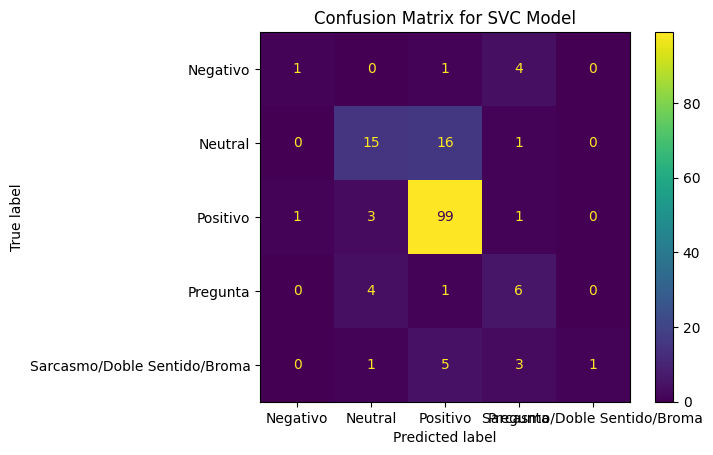

In [159]:
cm_test = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=clf.classes_)
disp.plot()
plt.title("Confusion Matrix for SVC Model")
plt.show()

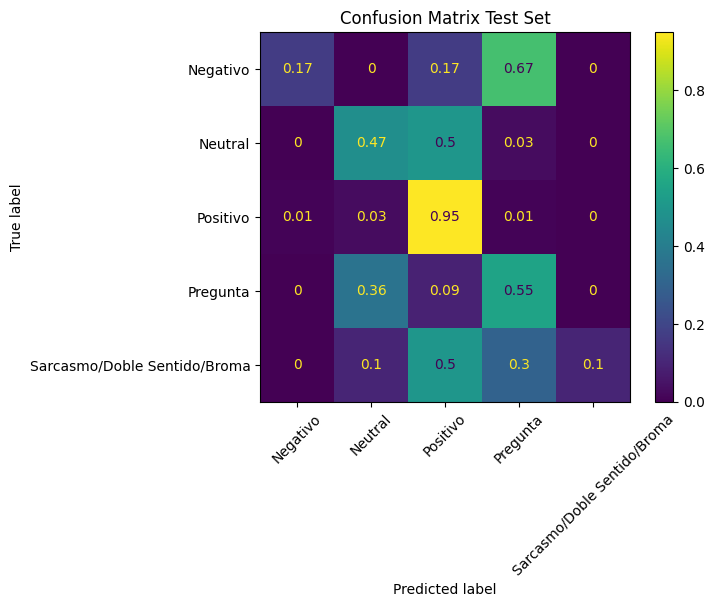

In [160]:
cm_test_percent = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
cm_test_percent = np.round(cm_test_percent,2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test_percent, display_labels=clf.classes_)
disp.plot()
plt.title("Confusion Matrix Test Set")
plt.xticks(rotation=45)
plt.show()


In [161]:
y_train_pred = clf.predict(X_train)

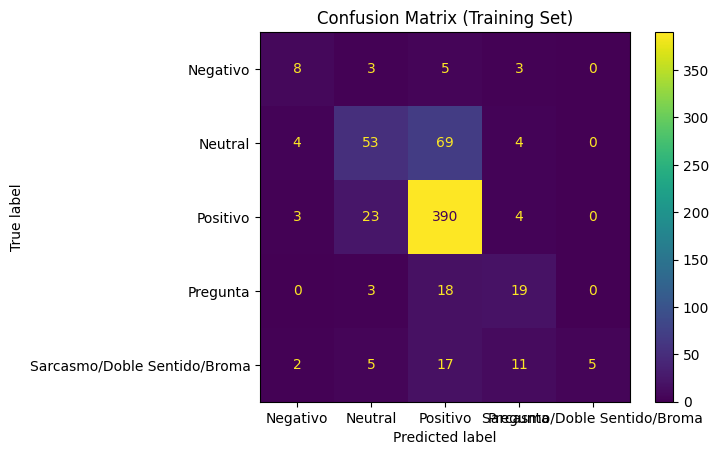

In [162]:
cm_train = confusion_matrix(y_train, y_train_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=clf.classes_)
disp.plot()
plt.title("Confusion Matrix (Training Set)")
plt.show()


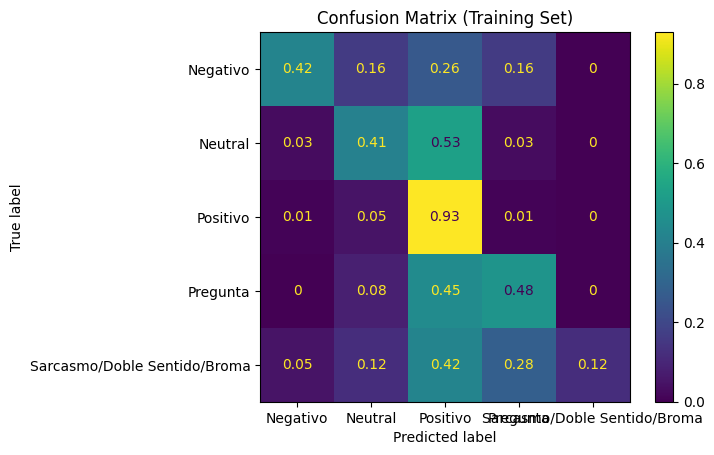

In [163]:
cm_train_percent = cm_train.astype('float') / cm_train.sum(axis=1)[:, np.newaxis]
cm_train_percent = np.round(cm_train_percent,2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train_percent, display_labels=clf.classes_)
disp.plot()
plt.title("Confusion Matrix (Training Set)")
plt.show()


#Different SVC Models

In [164]:
from sklearn.model_selection import GridSearchCV

In [167]:
svc_models = {
    'svc_model_1': {'C': [0.1, 1, 10], 'kernel': ['linear']},
    'svc_model_2': {'C': [0.1, 1, 10], 'kernel': ['rbf'], 'gamma': [0.1, 1, 10]},
    'svc_model_3': {'C': [0.1, 1, 10], 'kernel': ['sigmoid'], 'gamma':[0.1,1,10]}
}

for model_name, params in svc_models.items():
    svc = SVC()
    grid_search = GridSearchCV(estimator=svc, param_grid=params, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best score for {model_name}: {grid_search.best_score_}")
    y_train_pred = grid_search.predict(X_train)
    cm_test = confusion_matrix(y_test, y_pred)

Best parameters for svc_model_1: {'C': 10, 'kernel': 'linear'}
Best score for svc_model_1: 0.7211449016100178
Best parameters for svc_model_2: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best score for svc_model_2: 0.7396660703637449
Best parameters for svc_model_3: {'C': 1, 'gamma': 10, 'kernel': 'sigmoid'}
Best score for svc_model_3: 0.6502325581395348


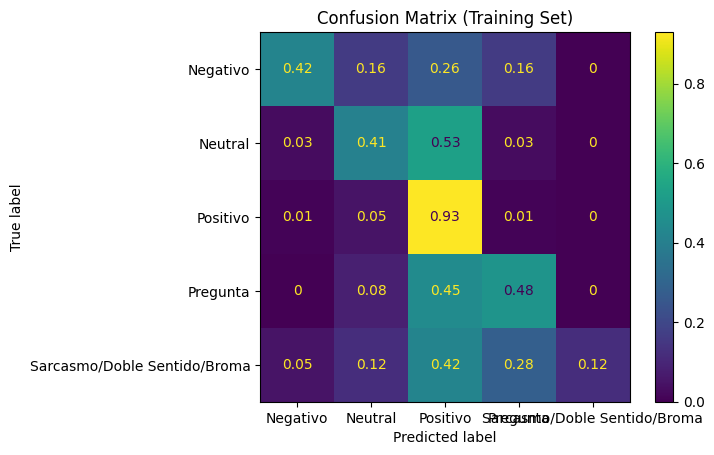

In [166]:
cm_train_percent = cm_train.astype('float') / cm_train.sum(axis=1)[:, np.newaxis]
cm_train_percent = np.round(cm_train_percent,2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train_percent, display_labels=clf.classes_)
disp.plot()
plt.title("Confusion Matrix (Training Set)")
plt.show()